# Using Ordinary Least Squares Regression  to predict predict housing prices 


This project is adapted from Source:https://www.nickmccullum.com/python-machine-learning/linear-regression-python/

This notebook uses a  randomly generated dataset to build a linear regression model that predicts housing prices

## Project Objective
The purpose of this project is to predict housing based on area income,house age,avg number of bedrooms, average number of rooms and area population.

## 1. Collect the Data
The process starts with importing the Panda’s and numpy packages.

In [207]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr # import pearsonr function to calculate  Pearson correlation coefficient

Next import the data into a Pandas data frame and preview the data frame.

In [208]:
df = pd.read_csv("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/Module Portfolio - Data Science Professional Practice/Housing/Housing_Data.csv")

Use the <span style="color:green">.head() method </span>which provides a concise summary of the data frame. 

In [209]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


## 2. Tidy up the data set


The field names in the dataset are long rename fields.

In [210]:
df.rename(columns={'Avg. Area Income': 'Avg_Income', 'Avg. Area House Age': 'House_Age', \
                    'Avg. Area Number of Rooms': '#Rooms','Avg. Area Number of Bedrooms': '#Bedrooms',\
                    'Area Population': 'Population'}, inplace=True)

Check the data set for any missing data

In [211]:
df.isnull().sum(axis=0)

Avg_Income    0
House_Age     0
#Rooms        0
#Bedrooms     0
Population    0
Price         0
Address       0
dtype: int64

<span style="color:red">**Note :**</span>  there are no fields within the dataset for this model that have missing data 

In [212]:
df.head()

,Avg_Income,House_Age,#Rooms,#Bedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


The dataset has seven fields.  `Avg_Income`, `House_Age`, `#Rooms`, `#Bedrooms`, `Population`, `Price` and `Address`. The formmer six variables are the predictors (or independent variables), while `Price` is the response (or dependent variable).

However the `Address` field is not needed so drop  `Address`

<span style="color:red">**Note :**</span>  there are no fields within the dataset for this model that have missing data 

Next remove any variables that are not required or this model namely `Address`.

In [213]:
df.drop(columns = ['Address'], inplace=True)


## 2. Explore the Data
A concise summary data tructure by calling the info() method.

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Avg_Income  5000 non-null   float64
 1   House_Age   5000 non-null   float64
 2   #Rooms      5000 non-null   float64
 3   #Bedrooms   5000 non-null   float64
 4   Population  5000 non-null   float64
 5   Price       5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


There are 5,000 instances (or rows) in the dataset.

The dataset consists of 6 features (or columns). 

Summary statistics for the numeric features in the data by calling the describe() method.

In [215]:
df.describe()

,Avg_Income,House_Age,#Rooms,#Bedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


<span style="color:red">**Note :**</span>  there are no discernible outliers within the dataset

### 2.1. Pair plot for data overview

A useful way to have an overview of the data frame is by generating a pairplot (seaborn method pairplot) and pass in the entire data frame as a parameter. 

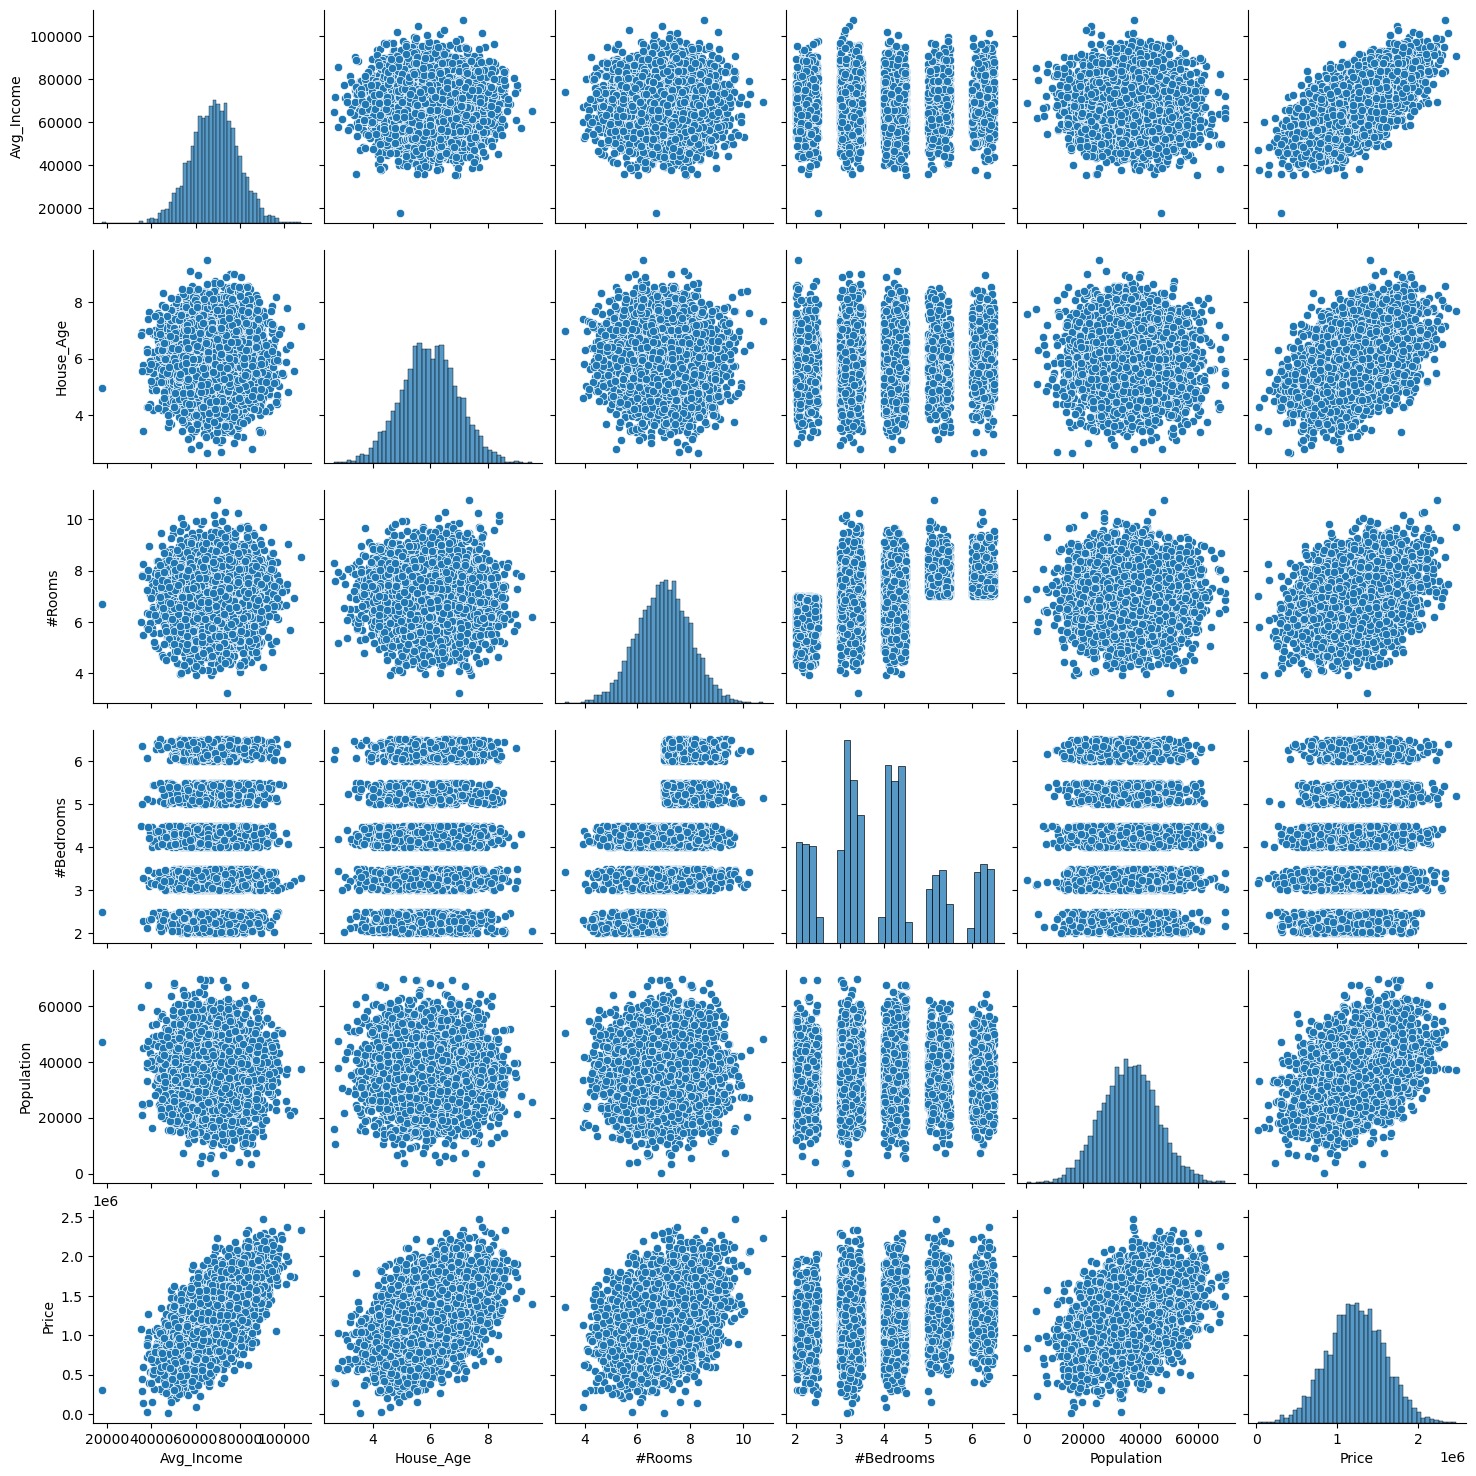

In [216]:
sns.pairplot(df)

### 2.2. Use Pearson correlation test to confirm correlation

In [217]:
pc1 = pearsonr(df['#Rooms'], df['Price'])
pc1

PearsonRResult(statistic=0.33566445335939743, pvalue=6.165892641715112e-132)

Pearson correlation coefficient (r):0.33567. The correlation between rooms and price is a weak positive correlation.  (Note: a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.)

The Two-tailed p-value:6.1659 is greater than 0.05 indicating that there is not a statistically significant association between the two variables 

The scatterplot confirms this conclusion

In [218]:
pc2 = pearsonr(df['Avg_Income'], df['Price'])
pc2

PearsonRResult(statistic=0.6397337782571285, pvalue=0.0)

Pearson correlation coefficient (r):0.6397. The correlation between average income and price is a strong positive correlation.  (Note: a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.)

The Two-tailed p-value:0.00 is less than 0.05 indicating that there is a statistically significant association between the two variables 

The scatterplot confirms this conclusion

In [219]:
pc3 = pearsonr(df['House_Age'], df['Price'])
pc3

PearsonRResult(statistic=0.4525425371785788, pvalue=4.944750036309005e-251)

Pearson correlation coefficient (r):0.4525. The correlation between average income and price is a moderate positive correlation.  (Note: a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.)

The Two-tailed p-value:4.94 is greater than 0.05 indicating that there is not a statistically significant association between the two variables 

The scatterplot confirms this conclusion

## 3. Prepare the Data

Before building the model, it is necessary to split the data into train and test datasets.  
#### Step 1
1. Start by creating a data frame <span style="color:blue">Y for the dependent variable</span> (this will only be one). 

In [220]:
response = 'Price' # in the variable "response" put the name of the dependent variable
y = df[[response]] # create a single column data frame called y which willl contain the dependent variable
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


#### Step 2
2. Next create another data frame <span style="color:red">X for the independent variables</span> (there can be one or more independent variable).  

In [221]:
predictors = list(df.columns) # lists the columns in the data frame stored in a variable called "predictors"
predictors.remove(response) # from predictors remove the response field
x = df[predictors] # put all the independent variables into a data frame called x
x

,Avg_Income,House_Age,#Rooms,#Bedrooms,Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


#### Step 3
3. Import the train/test split function from SK Learn model selection sub package.  

In [222]:
from sklearn.model_selection import train_test_split

#### Step 4
4. Split the X and Y data frames into X_Train, X_Test and Y_Train, Y_Test. 

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1234) 

In [224]:
#sorted(y_test['Price'])

## 4. Train the Model
To build a Linear Regression Model in Python we need to import the linear regression class from the SK learn linear model sub package.


In [225]:
from sklearn.linear_model import LinearRegression

Use the linear regression function to build the model

<span style="color:green">*model = LinearRegression()*  </span>   
within the function call the fit method and pass to the fit method the x_train and y_train  
<span style="color:green">*model = LinearRegression().fit(x_train, y_train)*</span>

In [226]:
model = LinearRegression().fit(x_train, y_train) # note that the model(solution) is stored in the variable "model"

The objective of liner regression is to estimate:  
* Intercept (of the regression line)  
* Slope value (of the regression line)  
that best fits the data.

### Slope value (of the regression line) 
Next get the estimated slope values (coefficients) or the regression line by requesting the coef attributes of the model 

<span style="color:green">*model.coef_*</span>

It is easier to view the coefficients is by placing them in a DataFrame. This can be done with the following statement:

<span style="color:green">*df_coef = pd.DataFrame(model.coef_, columns=['Avg_Income', 'House_Age', '#Rooms','#Bedrooms', 'Population'])*</span>

In [227]:
df_coef = pd.DataFrame(model.coef_, columns=['Avg_Income', 'House_Age', '#Rooms','#Bedrooms', 'Population'])
df_coef

,Avg_Income,House_Age,#Rooms,#Bedrooms,Population
0,21.654294,163560.682451,122831.999724,1952.271466,15.2247


### 4.1. Observations
The coefficients represent the extent to which the mean of the corresponding predictor variable deviates from the estimated mean price of housing. The coefficient values are an indicator of how much the predictor influences the price of a house.  

Listed below in descending order of influence are the coefficients (rounded to 2 decimal places): 
* Population			   15.22  
* Average Income		   21.65  
* Number of Bedrooms    1,952.27  
* Number of Rooms     122,831.00  
* House Age		      163,560.68  



## 5.1 Making Predictions

In [228]:
predictions = model.predict(x_test)

### 5.1.1. Compare the values of the predictions with the values of y_test.

The predicted values are close to the actual values of the y-test data set. A straight diagonal line in this scatterplot would indicate that the model perfectly predicted all the values with respect to the y-test values.

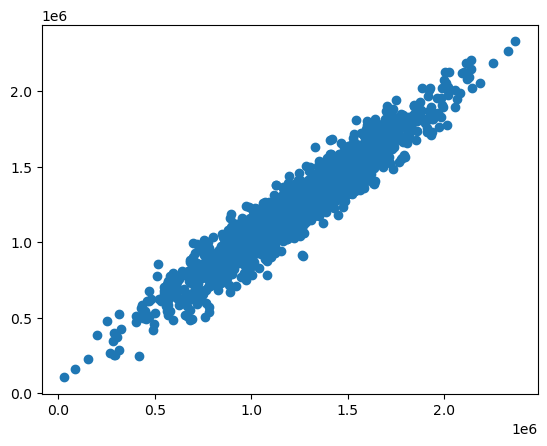

In [229]:
plt.scatter(y_test, predictions)

### 5.1.2. Plotting model residuals as a histogram
Plotting  the residuals from the model as a histogram  shows that the residuals are normally distributed which is a good indication that the model type selected for this analysis is appropriate.


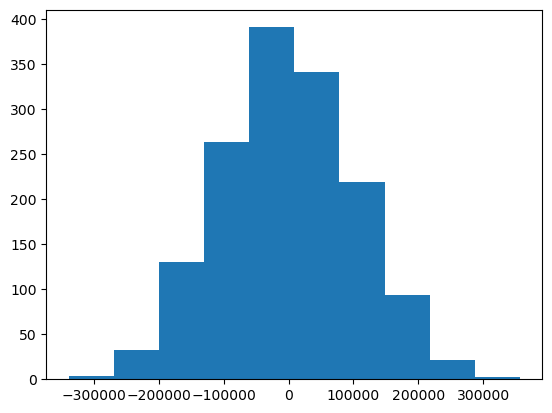

In [230]:
his = plt.hist(y_test - predictions)

## 6. Testing model performance

* Mean absolute error
* Mean squared error
* Root mean squared error


In [231]:
from sklearn import metrics

### 6.1. Mean Absolute Error (MAE)

In [232]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MAE

82171.93657500953

### 6.2. Mean Squared Error (MSE)

In [233]:
MSE = round(metrics.mean_squared_error(y_test, predictions),2)
MSE

10603499971.4

### 6.3. Root Mean Squared Error (RMSE)
RMSE (root mean squared error) is  the square root of MSE (mean squared error).  
Can be calculated in several ways (two shown below).

In [234]:
RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2)
RMSE

102973.3

In [235]:
RSME_2 = round(np.sqrt(MSE),2)
RSME_2

102973.3

In [236]:
mape = (mean_absolute_percentage_error(y_test, predictions))*100
mape

7.834389281941672

### 6.4. Plotting the Mean Squared Error (MSE)
In the scatterplot below the deviations between predicted and actual are marked with red lines between the actual value and the corresponding prediction

<function matplotlib.pyplot.show(close=None, block=None)>

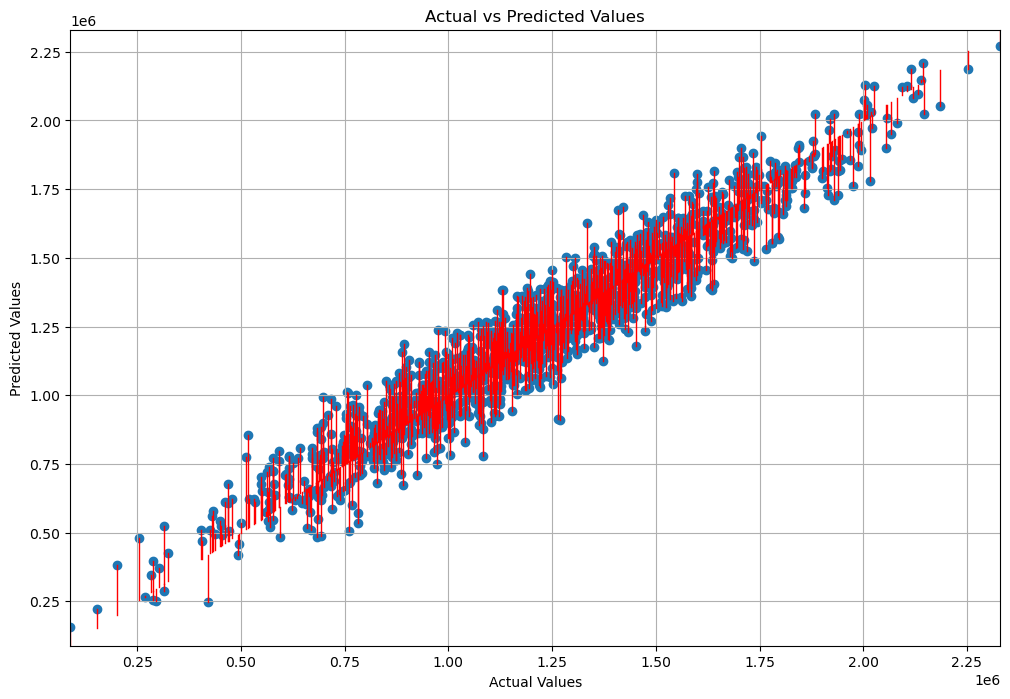

In [237]:
plt.figure(figsize =(12,8))
plt.scatter(y_test,predictions)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# calculate and plot the residuals as vertical lines
error = y_test - predictions
for e in range (len(error)):
    plt.plot([y_test.iloc[e],y_test.iloc[e]],[y_test.iloc[e],predictions[e]],'r-',lw=1)

# Define axis limits based on the second highest and second lowest values
sorted_y_test = sorted(y_test['Price'])
second_lowest = sorted_y_test[1]
second_highest = sorted_y_test[-2]

plt.xlim(second_lowest,second_highest)
plt.ylim(second_lowest,second_highest)

plt.grid(True)
plt.show

Using the above visual helps to clariy whether the mean squared error was characterized by some outlier and a number of gross error predictions or as in this case the predictions deviated some slightly but others quite distant from the actual value. 

## 6.5. Regression Metrics

In [238]:
explained_variance = metrics.explained_variance_score(y_test, predictions)
mean_absolute_error = metrics.mean_absolute_error(y_test, predictions) 
mse = metrics.mean_squared_error(y_test, predictions)
mean_squared_log_error = metrics.mean_squared_log_error(y_test, predictions)
median_absolute_error = metrics.median_absolute_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

print('Explained Variance:', round(explained_variance, 4)) 
print('Mean Squared Log Error:', round(mean_squared_log_error, 4))
print('R²:', round(r2, 4))
print('Mean Absolute Error:', round(mean_absolute_error, 4))
print('Mean Squared Error:', round(mse, 4))
print('Root Mean Squared Error:', round(np.sqrt(mse), 4))

Explained Variance: 0.9177
Mean Squared Log Error: 0.0117
R²: 0.9177
Mean Absolute Error: 82171.9366
Mean Squared Error: 10603499971.402
Root Mean Squared Error: 102973.2974


## 6.6. Conclusion

#### R-squared = 0.9177 (91.7%)
R-squared is a goodness-of-fit measure for linear regression models. This measure indicates the percentage variance between the dependent variable and independent variables. While on the surface this metric looks impressive its value is not corroborated by the **Actual vs Predicted Values scatterplot**. The plotted residuals do not reflect a tightness of fit that equates to 91.7%. The residuals plot indicates that there may be bias within the model and this result can not be trusted.

Source:https://statisticsbyjim.com/regression/interpret-r-squared-regression/  


#### Mean Absolute Error (MAE)  = 82171.93
The model had a large Mean Absolute Error (MAE) which suggests that the model may not be ideal. The `Actual vs Predicated` plot above shows that there a significant number of large residuals in the model.  MAE metric is influenced by a significant number of outliers which diminish the model’s performance.     
  
#### Mean Squared Error (MSE) = 10603499971.402  
The MSE for this model is huge which reinforces the conclusion that outliers and large residuals are influencing the performance of this model. Each residual error in the MAE metric contributes proportionally to the total error. However when MMSE is used as a metric the size o the error is quadrupled. This means that large residuals or outliers will  contribute to a significantly larger MSE when compared to MAE. Furthermore the model is penalised more or making predictions that differ greatly from the corresponding actual value.  
  
#### Root Mean Squared Error (RMSE) = 102973.2974   
(RMSE) is the square root of the MSE so it is still affected by large residuals and outliers in the model. RMSE is helpful as it is comparable to the standard deviation and is a measure of how large residuals are spread out.  
  
#### Mean Absolute Percentage Error (MAPE) = 7.83%
MAPE measures the average percentage of the absolute errors between the predicted values and the actual values. MAPE is used to determine how accurate model predictions are in relation to the actual values.  
  
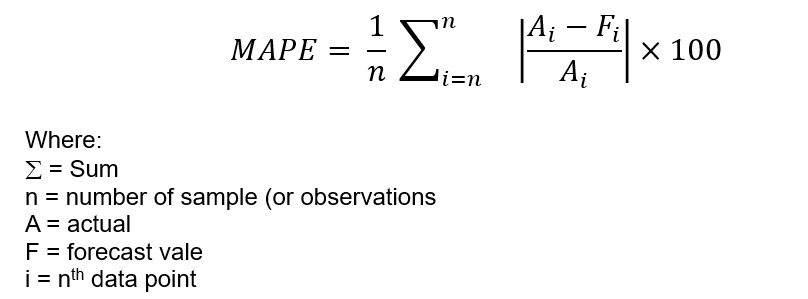
  
Lower  MAPE values how far the predictions are from the actual values. In this model the calculated MAPE is  7.8% which indicates that on average how far the predictions are from the actual values.
  
Source: https://www.statology.org/mape-python/

#### Summary

The coefficient for bedrooms offers little if any value to the model as its influence is minimal. The residual plot and the biased R-squared measure suggest that the model contains bias. The MAE and MSE are not helpful either as they too display significant variance.  
  
Listed below in descending order are the coefficients (rounded to 2 decimal places): 

<table>
<thead>
<tr><th>Predictor</th><th>Coefficient</th></tr>
</thead>
<tbody>
<tr><td>Population</td><td>15.22</td></tr>
<tr><td>Average Income</td><td>21.65</td></tr>
<tr><td>Number of Bedrooms</td><td>1,952.27</td></tr>
<tr><td>Number of Rooms</td><td>122,831.00</td></tr>
<tr><td>House Age</td><td>163,560.68</td></tr>
</tbody>
</table>
  
How good is this model? The metric indicate that this is a less than perfect model. The bedroom variable adds little value to the model. The best approach to evaluate this model would be to construct a second model with different predictor variables. Unfortunately this data set does not contain any other useful variables. 